In [1]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# read the file description

with open('/content/Invisareviews_titles.txt', 'r') as fh:
  filedata = fh.read()

# check contents 
print("File data sample : ", filedata[:300])

# create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#generate wordcloud data 
wordcloud = WordCloud(stopwords = stopwords, max_words = 40, \
                      background_color="white").generate(filedata)

File data sample :  Poor customer service
Not as advertised!
Don't go with invisalign they rip you…
Definitely not for everyone
Avoid at ALL costs
All done and results are perfect
Not worth it
AVOID... I was near the end of my consultation…
Haven't even managed to get an appointment yet
Waste of time and money
100% rec


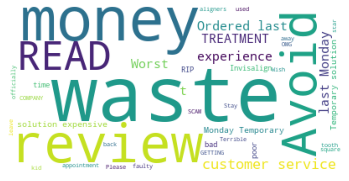

In [40]:
# display the wordcloud 
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

None


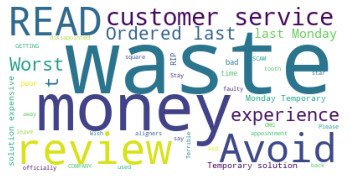

In [49]:
# enhancing Wordcloud
# add more words to ignore
stopwords.update(["Invisalign", "week", "treatment", "teeth", "even", "now" , "really", "set", "dentist", "weeks"])

#Redo stopwords
wordCloud = WordCloud(stopwords = stopwords, max_words = 40, \
                      background_color = "white"). generate(filedata)

mpLib.imshow(wordCloud)
mpLib.axis("off")
mpLib.show()

##Sentiment Analysis

# New section

In [31]:
with open ('/content/Invisareviews.txt', 'r') as fh:
  reviews = fh.readlines()
print(reviews[:3])

['"Actual treatment was fine, and worked for me.\n', '\n', 'However, initial retainers took 2 months to arrive, In which time my teeth started to shift back to original positions.\n']


## Finding Sentiment by Review

In [32]:

from textblob import TextBlob
print('{:40} :  {:10} : {:10}'.format("Review" , "Polarity", "Subjectivity") )

for review in reviews:
  # Find sentiment of a review
  sentiment = TextBlob(review)
  # Print individual sentiments 
  print('{:40} :  {:01.2f} :  {:01.2f}'.format(review[:40]\
                                                      , sentiment.polarity, sentiment.subjectivity))

Review                                   :  Polarity   : Subjectivity
"Actual treatment was fine, and worked f :  0.21 :  0.30

                                        :  0.00 :  0.00
However, initial retainers took 2 months :  0.12 :  0.25
Recently had a crown fitted so had to or :  0.07 :  0.35

                                        :  0.00 :  0.00
Recommend the treatment but get the reta :  0.50 :  0.50
Invisalign should not be advertised as a :  -0.03 :  0.55
Don't go with invisalign they rip you of :  0.00 :  0.00
"Definitely not for everyone, and the pr :  0.00 :  0.58
Really is not worth the £3500 plus I pai :  -0.15 :  0.10
I saw no real improvement after 6 months :  -0.10 :  0.30
"So far, having an awful experience and  :  -0.04 :  0.48
AVOID AT ALL COSTS as it will cost you m :  0.25 :  0.45
"Finished the treatment and the results  :  0.37 :  0.47
Experience will vary depending on your o :  0.12 :  0.88
Not worth it, waste of money
            :  -0.17 :  0.05
"I was near t

Final summarized counts :  [158, 37, 18]

 Pie Representation 
-----------------------


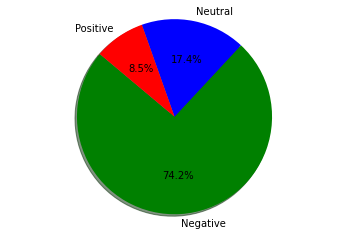

In [33]:
#Categorize Polarity Into Positive, Neutral, or Negative

labels = ["Negative", "Neutral", "Positive"]
# Initialise count array
values = [0,0,0]

#Categorize each review 
for review in reviews:
  sentiment = TextBlob(review)

  #custom formula to convert polarity
  # 0 = (Negative) 1 = (Neutral) 2 = (Positive)
  polarity = round((sentiment.polarity + 1 ) * 3 ) % 3 

  #add the sumary array 
  values[polarity] = values[polarity] + 1

print("Final summarized counts : ", values)

import matplotlib.pyplot as plt
#Set colours by label 
colors = ["Green", "Blue", "Red"]

print("\n Pie Representation \n-----------------------")
#Plot a pie chart
plt.pie(values, labels = labels, colors = colors, \
        autopct = '%1.1f%%', shadow = True, startangle= 140)
plt.axis('equal')
plt.show()